In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#will read our data
data=pd.read_csv('/content/SPAM text message 20170820 - Data.csv')

In [3]:
data.head(3)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [4]:
data.shape

(5572, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [13]:
count=data.Category.value_counts()
count

,count
Category,
ham,4825
spam,747


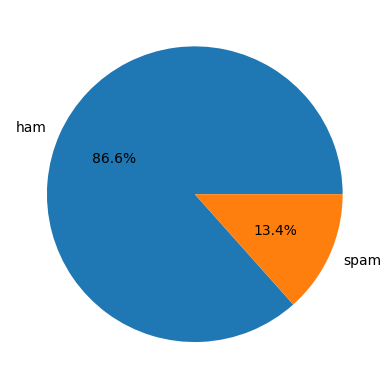

In [12]:
plt.pie(count,labels=count.index,autopct='%1.1f%%')
plt.show()


##here we absorve that the dataset contain 86% ham responces and only 13% of spam responces

<Axes: ylabel='Frequency'>

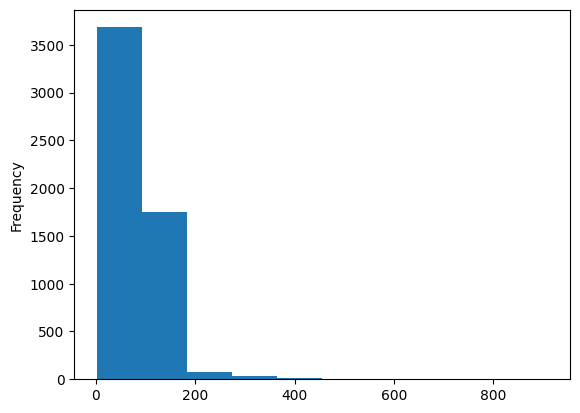

In [14]:
data.Message.str.len().plot(kind='hist')

##around 3700 rows contain 0-180 words

Text(0.5, 1.0, 'spam')

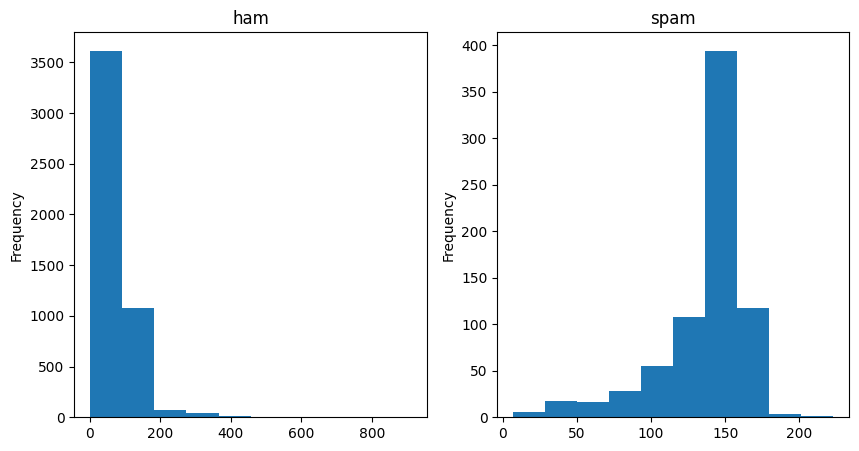

In [25]:
#will plot ham and spam message length
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
data[data['Category']=='ham']['Message'].str.len().plot(kind='hist',ax=ax1)
ax1.set_title('ham')
data[data['Category']=='spam']['Message'].str.len().plot(kind='hist',ax=ax2)
ax2.set_title('spam')

##ham responces contain slightly more length than spam

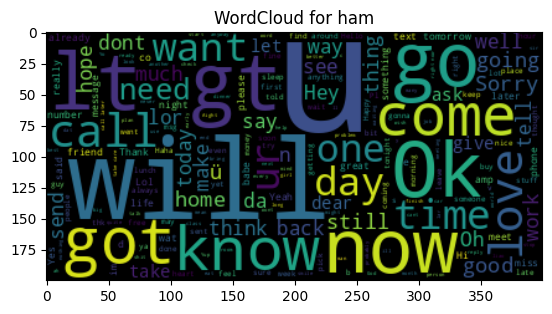

In [35]:
#will create wordcloud
from wordcloud import WordCloud
msg= ' '.join(data[data['Category']=='ham']['Message'])
ham_wc=WordCloud(background_color='black').generate(msg)
plt.title('WordCloud for ham')
plt.imshow(ham_wc,interpolation='bilinear')
plt.show()

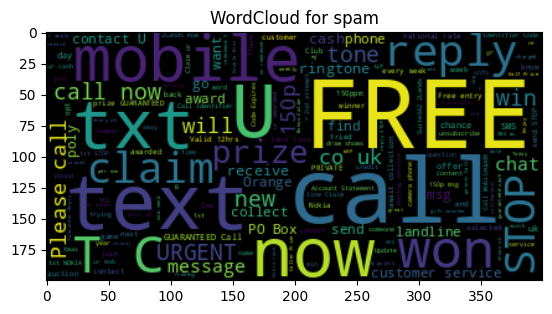

In [36]:
msg= ' '.join(data[data['Category']=='spam']['Message'])
ham_wc=WordCloud(background_color='black').generate(msg)
plt.title('WordCloud for spam')
plt.imshow(ham_wc,interpolation='bilinear')
plt.show()

In [38]:
data.Message[6]

'Even my brother is not like to speak with me. They treat me like aids patent.'

In [39]:
data.Message[13]

"I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."

In [40]:
#will clean the data now
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [46]:
def cleaning(text):
# converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # converting to lowercase
    text = re.sub(r"\b\d+\b", " ", text) # removing number
    text = re.sub('<.*?>+', '', text) # removing special characters,
   #remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

# remove emjoi pattern

    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

# remove all short forms of lexical language
    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)
    return text

In [47]:
data1=data['Message'].apply(cleaning)
data1.head()

,Message
0,go until jurong point crazy available only in ...
1,ok lar joking wif u oni
2,free entry in a wkly comp to win fa cup fina...
3,u dun say so early hor u c already then say
4,nah i dont think he goes to usf he lives aroun...


In [48]:
data1=pd.DataFrame(data1)
data1.head()

,Message
0,go until jurong point crazy available only in ...
1,ok lar joking wif u oni
2,free entry in a wkly comp to win fa cup fina...
3,u dun say so early hor u c already then say
4,nah i dont think he goes to usf he lives aroun...


In [49]:
data1['Category']=data['Category']
data1.head()

,Message,Category
0,go until jurong point crazy available only in ...,ham
1,ok lar joking wif u oni,ham
2,free entry in a wkly comp to win fa cup fina...,spam
3,u dun say so early hor u c already then say,ham
4,nah i dont think he goes to usf he lives aroun...,ham


In [50]:
sw=stopwords.words('english')

In [52]:
data1['Message']=data1['Message'].apply(lambda x: ' '.join([word for word in x.split() if word not in sw]))
data1.head()

,Message,Category
0,go jurong point crazy available bugis n great ...,ham
1,ok lar joking wif u oni,ham
2,free entry wkly comp win fa cup final tkts 21s...,spam
3,u dun say early hor u c already say,ham
4,nah dont think goes usf lives around though,ham


In [60]:
from collections import Counter
cnt=Counter()
for text in data1['Message'].values:
    for word in text.split():
        cnt[word]+=1
cnt.most_common(10)

temp=pd.DataFrame(cnt.most_common(10),columns=['word','count'])
temp

,word,count
0,u,1139
1,call,575
2,im,466
3,ur,390
4,get,386
5,£,292
6,dont,287
7,go,281
8,ok,278
9,free,276


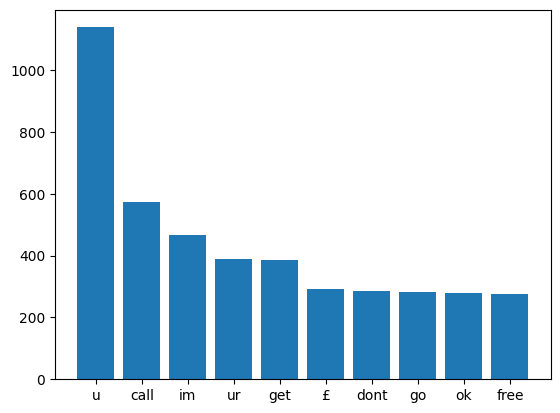

In [61]:
plt.bar(temp['word'],temp['count'])
plt.show()

In [62]:
freq_words = set([w for (w, wc) in cnt.most_common(20)])
def remove_freq_words(text):
    return " ".join([word for word in str(text).split() if word not in (freq_words)])

In [63]:
data1['wo_stopfreq'] = data1['Message'].apply(lambda text:remove_freq_words(text))
data1.head(3)

,Message,Category,wo_stopfreq
0,go jurong point crazy available bugis n great ...,ham,jurong point crazy available bugis n great wor...
1,ok lar joking wif u oni,ham,lar joking wif oni
2,free entry wkly comp win fa cup final tkts 21s...,spam,entry wkly comp win fa cup final tkts 21st may...


In [55]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
from nltk.stem import WordNetLemmatizer
wordnet_lm=WordNetLemmatizer()

In [64]:
data1['wordnet_lm'] = data1['wo_stopfreq'].apply(wordnet_lm.lemmatize)
data1.head(3)

,Message,Category,wo_stopfreq,wordnet_lm
0,go jurong point crazy available bugis n great ...,ham,jurong point crazy available bugis n great wor...,jurong point crazy available bugis n great wor...
1,ok lar joking wif u oni,ham,lar joking wif oni,lar joking wif oni
2,free entry wkly comp win fa cup final tkts 21s...,spam,entry wkly comp win fa cup final tkts 21st may...,entry wkly comp win fa cup final tkts 21st may...


In [66]:
nb = data1.drop(columns=['Message', 'wo_stopfreq'])
nb.columns = ['Category', 'wordnet_lm']
nb.head()

,Category,wordnet_lm
0,ham,jurong point crazy available bugis n great wor...
1,ham,lar joking wif oni
2,spam,entry wkly comp win fa cup final tkts 21st may...
3,ham,dun say early hor c already say
4,ham,nah think goes usf lives around though


In [67]:
nb.Category=nb.Category.map({'ham':0,'spam':1})
nb.head()

,Category,wordnet_lm
0,0,jurong point crazy available bugis n great wor...
1,0,lar joking wif oni
2,1,entry wkly comp win fa cup final tkts 21st may...
3,0,dun say early hor c already say
4,0,nah think goes usf lives around though


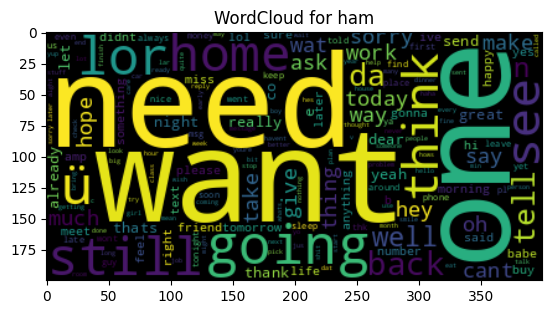

In [68]:
#word cloud for positive reviews
msg= ' '.join(nb[nb['Category']==0]['wordnet_lm'])
ham_wc=WordCloud(background_color='black').generate(msg)
plt.title('WordCloud for ham')
plt.imshow(ham_wc,interpolation='bilinear')
plt.show()

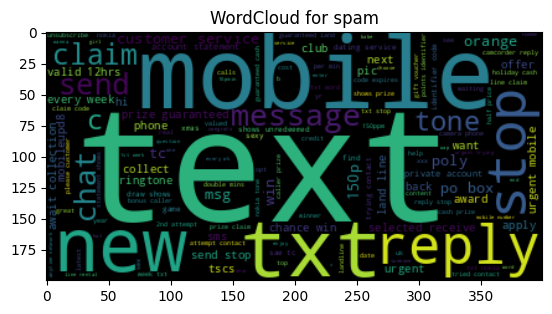

In [69]:
msg= ' '.join(nb[nb['Category']==1]['wordnet_lm'])
ham_wc=WordCloud(background_color='black').generate(msg)
plt.title('WordCloud for spam')
plt.imshow(ham_wc,interpolation='bilinear')
plt.show()

In [70]:
token_review = nb['wordnet_lm'].apply(lambda x:x.split())
token_review.head()

,wordnet_lm
0,"[jurong, point, crazy, available, bugis, n, gr..."
1,"[lar, joking, wif, oni]"
2,"[entry, wkly, comp, win, fa, cup, final, tkts,..."
3,"[dun, say, early, hor, c, already, say]"
4,"[nah, think, goes, usf, lives, around, though]"


In [71]:
#create bag of words
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(nb['wordnet_lm'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [72]:
text_counts

<5572x8628 sparse matrix of type '<class 'numpy.int64'>'
	with 37913 stored elements in Compressed Sparse Row format>

In [73]:
from sklearn.model_selection import train_test_split
x=text_counts
y=nb['Category']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mnb=MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [77]:
predicted=mnb.predict(X_test)
predicted

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
accuracy_score(y_test,predicted)

0.9688995215311005

In [80]:
confusion_matrix(y_test,predicted)

array([[1410,   32],
       [  20,  210]])

In [81]:
classification_report(y_test,predicted)

'              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.98      1442\n           1       0.87      0.91      0.89       230\n\n    accuracy                           0.97      1672\n   macro avg       0.93      0.95      0.94      1672\nweighted avg       0.97      0.97      0.97      1672\n'

In [88]:
#will predict new message
msg='Ela kano.,il download, come wen ur free..'
msg=cleaning(msg)
msg=remove_freq_words(msg)
msg=wordnet_lm.lemmatize(msg)
msg

'ela kanoil download wen'

In [89]:
#now we will predict msg is spam or ham
msg=cv.transform([msg])
mnb.predict(msg)

array([0])